# Analisi dati test TVAC

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Estraggo i dati dal file

In [30]:
# Prende i dati dal file skippando le prime 155 linee
data = np.genfromtxt('report.asc', delimiter='\t', skip_header=155, dtype=None, encoding='utf-8', names=True)

# varibili per memorizzare i dati
time = []
T_Shroud = []
T_Cold = []
P_Full_range = []
P_Chamber = []
T_Setpoint = []

# tiro fuori i dati dal file caricato in precedenza
for row in data:
    time.append(datetime.strptime(row[0], "%d/%m/%y %H:%M:%S"))
    T_Shroud.append(row[1])
    T_Cold.append(row[2])
    P_Full_range.append(row[17])
    P_Chamber.append(row[19])
    T_Setpoint.append(row[30])

## Analisi Dati

### T Shroud e T Shroud_setpoint

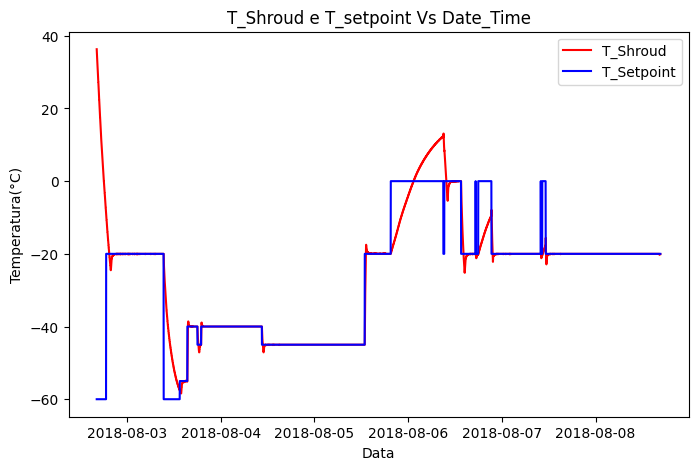

In [31]:
plt.figure(figsize=(8, 5))
plt.title("T_Shroud e T_setpoint Vs Date_Time")
plt.xlabel("Data")
plt.ylabel("Temperatura(°C)")
plt.plot(time, T_Shroud, color="red", label="T_Shroud")
plt.plot(time, T_Setpoint, color="blue", label="T_Setpoint")
plt.legend()
plt.show()

## P Full Range 1 chamber-ITR90 e P Chamber Vs Date_time

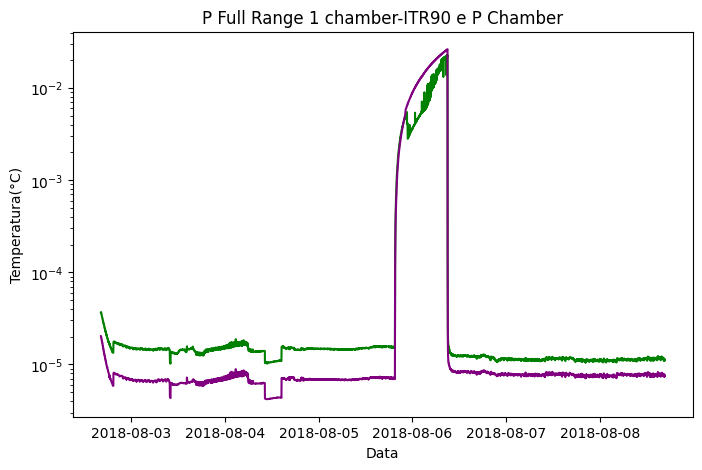

In [32]:
plt.figure(figsize=(8, 5))
plt.title("P Full Range 1 chamber-ITR90 e P Chamber")
plt.xlabel("Data")
plt.ylabel("Temperatura(°C)")
plt.plot(time,P_Full_range, color="Green")
plt.plot(time,P_Chamber, color="Purple")
plt.yscale("log")

## Andamento di T_shroud

### Funzione per trovare l'andamento

In [33]:
def andamento(array):
    
    end_index = 0
    result = []

    soglia = 0.09

    # fino a che ci sono elementi nella lista
    while end_index < len(array)-1:

        # se l'elemento start è minore di end [CRESCENTE]
        if (array[end_index])+soglia < array[end_index+1]:

            # fino a che l'elemento con endindex+1 è maggiore di endindex
            result.append(1)

        # se l'elemento start è maggiore di end [DECRESCENTE]
        elif (array[end_index])-soglia > array[end_index+1]:

            # fino a che l'elemento con endindex+1 è minore di endindex            
            result.append(-1)

        # se l'elemento start è uguale a end [STABILE]
        else:
            
            # fino a che l'elemento con endindex+1 è uguale a endindex
            result.append(0)

        end_index += 1

    return result

## Grafico T_shroud ed Andamento

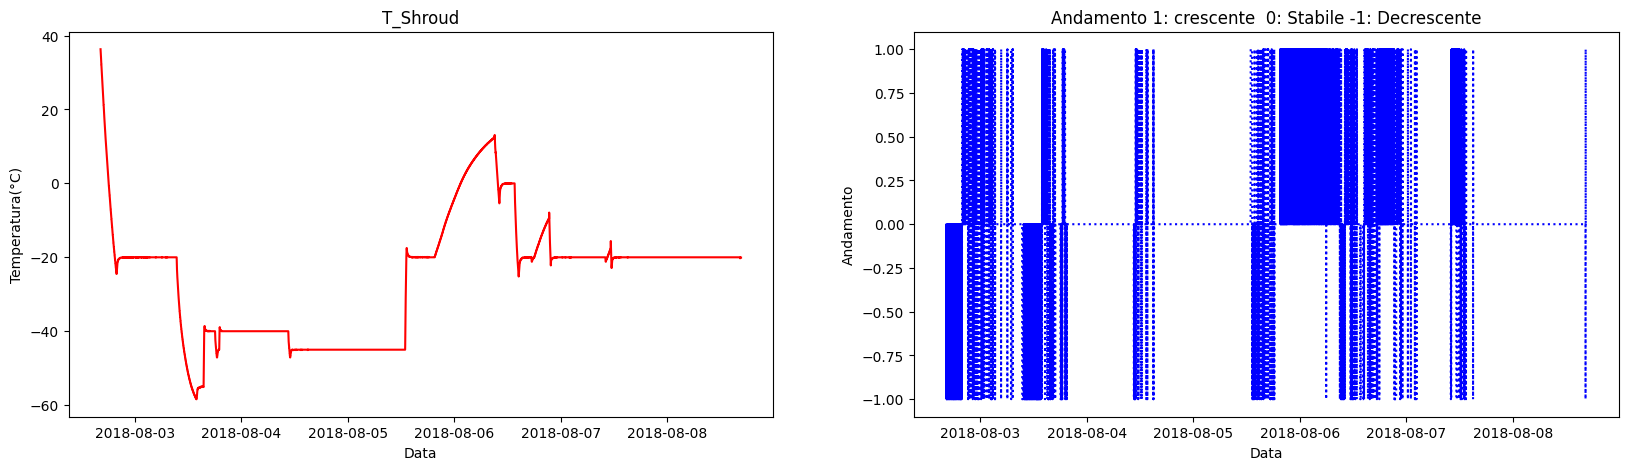

In [39]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))

axs[0].plot(time, T_Shroud,  color="red")
axs[0].set_title("T_Shroud")
axs[0].set_xlabel("Data")
axs[0].set_ylabel("Temperatura(°C)")

axs[1].plot(time[:-1], andamento(T_Shroud), color="blue", linestyle="dotted")
axs[1].set_title("Andamento 1: crescente  0: Stabile -1: Decrescente")
axs[1].set_xlabel("Data")
axs[1].set_ylabel("Andamento")
axs[1].set_yscale("linear")